AQI Prediction Model Using Python- PM2.5 PM10
- NO, NO2
- NH3-Ammonia
- CO
- So2
- O3
- Benzene, Toluene, Xylene

In [1]:
pip install numpy matplotlib seaborn scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


In [2]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
df = pd.read_csv('air quality data.csv')
df.head() # Top 5 rows!

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [4]:
#Shape - rows and cols!
df.shape

(29531, 16)

In [5]:
#Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [6]:
#to know the duplicate values
df.duplicated().sum()

0

In [7]:
#To check missing values
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [8]:
#Drop the rows where 'AQI' has missing values
df.dropna(subset=['AQI'], inplace = True)

In [9]:
df.isnull().sum().sort_values(ascending=False)

Xylene        15372
PM10           7086
NH3            6536
Toluene        5826
Benzene        3535
NOx            1857
O3              807
PM2.5           678
SO2             605
CO              445
NO2             391
NO              387
Date              0
City              0
AQI               0
AQI_Bucket        0
dtype: int64

In [10]:
df.shape

(24850, 16)

In [11]:
#Summary of Statistics in the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,24172.0,67.476613,63.075398,0.04,29.0000,48.785,80.9250,914.94
PM10,17764.0,118.454435,89.487976,0.03,56.7775,96.180,150.1825,917.08
NO,24463.0,17.622421,22.421138,0.03,5.6600,9.910,20.0300,390.68
NO2,24459.0,28.978391,24.627054,0.01,11.9400,22.100,38.2400,362.21
NOx,22993.0,32.289012,30.712855,0.00,13.1100,23.680,40.1700,378.24
NH3,18314.0,23.848366,25.875981,0.01,8.9600,16.310,30.3600,352.89
CO,24405.0,2.345267,7.075208,0.00,0.5900,0.930,1.4800,175.81
SO2,24245.0,14.362933,17.428693,0.01,5.7300,9.220,15.1400,186.08
O3,24043.0,34.912885,21.724525,0.01,19.2500,31.250,46.0800,257.73
Benzene,21315.0,3.458668,16.036020,0.00,0.2300,1.290,3.3400,455.03


In [12]:
null_values_percentages = (df.isnull().sum() / df.count() * 100).sort_values(ascending=False)
null_values_percentages

Xylene        162.186115
PM10           39.889664
NH3            35.688544
Toluene        30.624474
Benzene        16.584565
NOx             8.076371
O3              3.356486
PM2.5           2.804898
SO2             2.495360
CO              1.823397
NO2             1.598594
NO              1.581981
Date            0.000000
City            0.000000
AQI             0.000000
AQI_Bucket      0.000000
dtype: float64

#### Key Considerations:
- Xylene has the highest percentage of missing values - 61.86%
- PM10 and NH3 28- 26%

## Week 2 -- Visualization

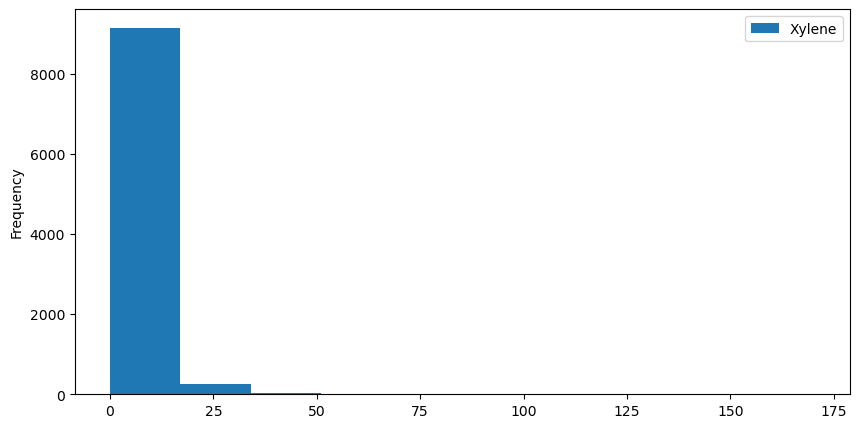

In [13]:
# Univariate analysis
df['Xylene'].plot(kind = 'hist', figsize=(10,5))
plt.legend()
plt.show()

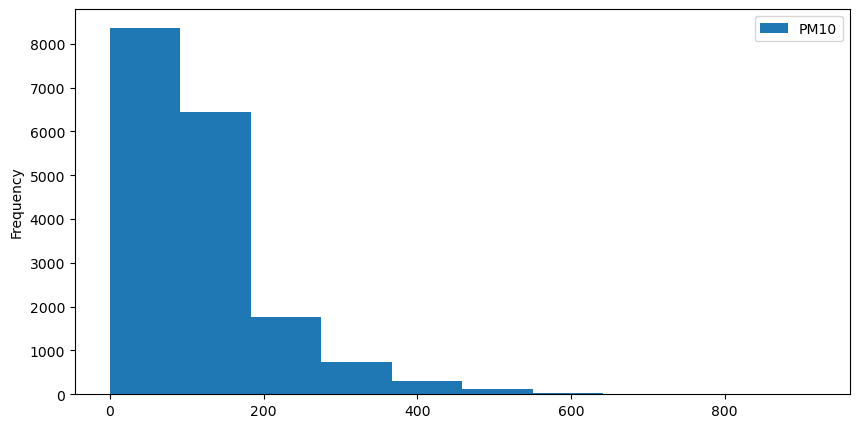

In [14]:
df['PM10'].plot(kind = 'hist', figsize=(10,5))
plt.legend()
plt.show()

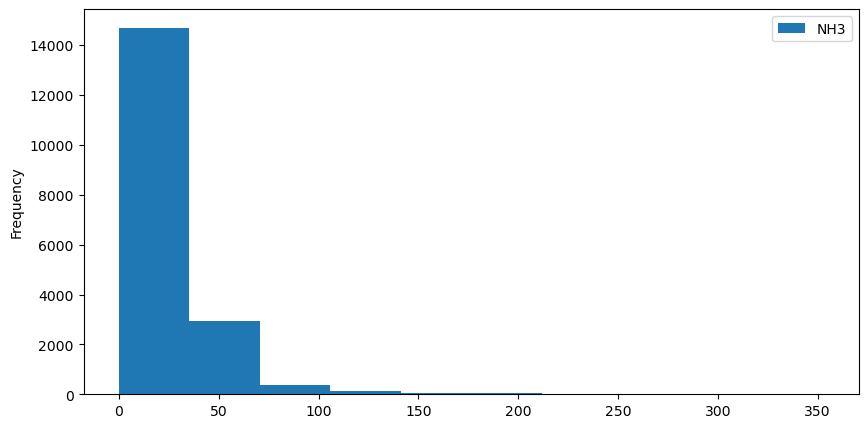

In [15]:
df['NH3'].plot(kind = 'hist', figsize=(10,5))
plt.legend()
plt.show()

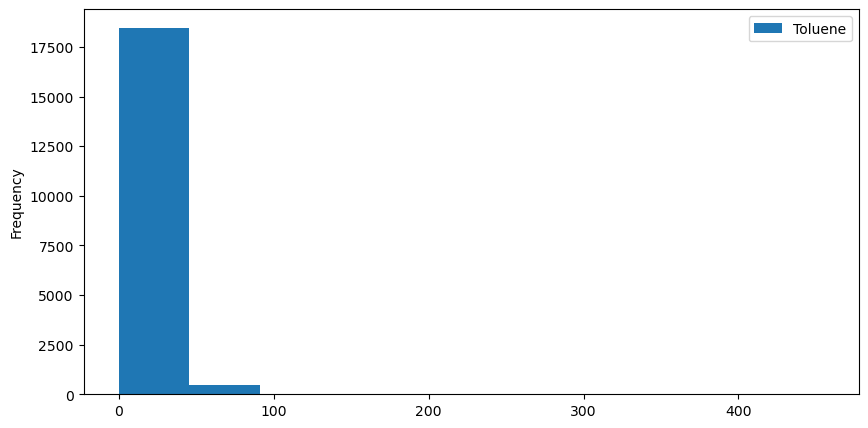

In [16]:
df['Toluene'].plot(kind = 'hist', figsize=(10,5))
plt.legend()
plt.show()

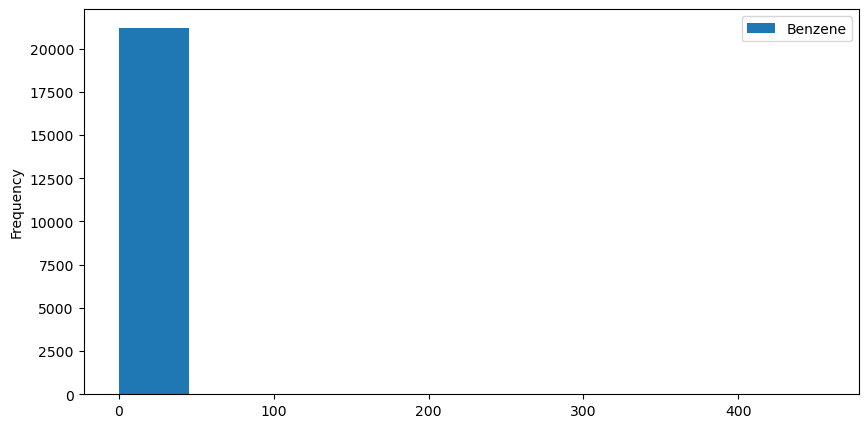

In [17]:
df['Benzene'].plot(kind = 'hist', figsize=(10,5))
plt.legend()
plt.show()

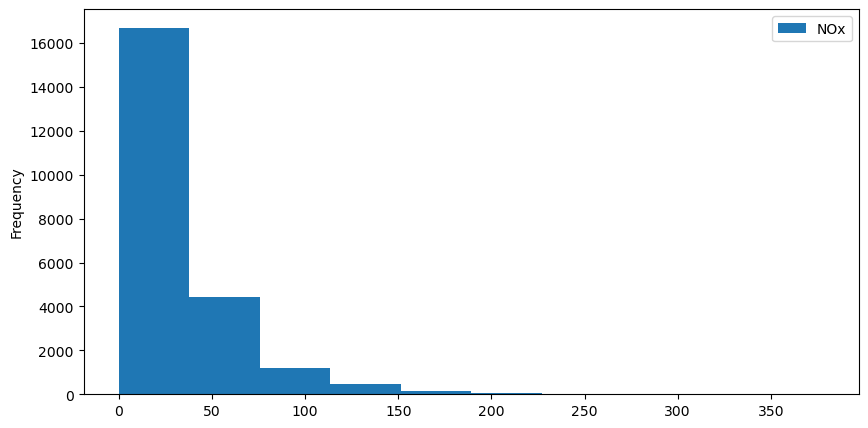

In [18]:
df['NOx'].plot(kind = 'hist', figsize=(10,5))
plt.legend()
plt.show()

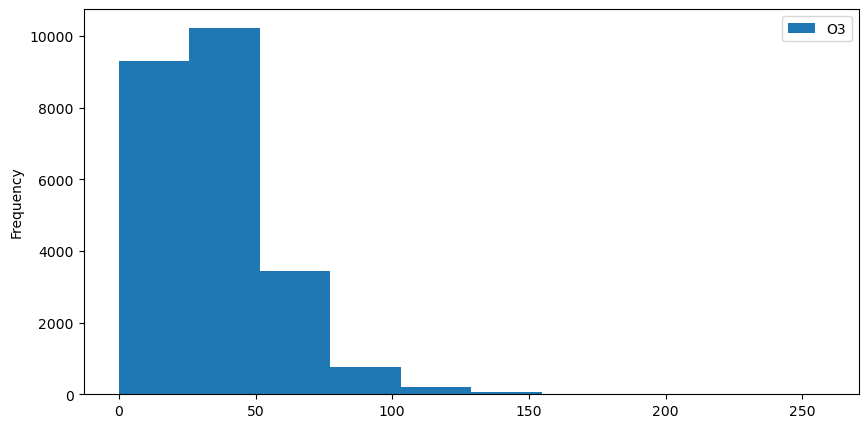

In [19]:
df['O3'].plot(kind = 'hist', figsize=(10,5))
plt.legend()
plt.show()

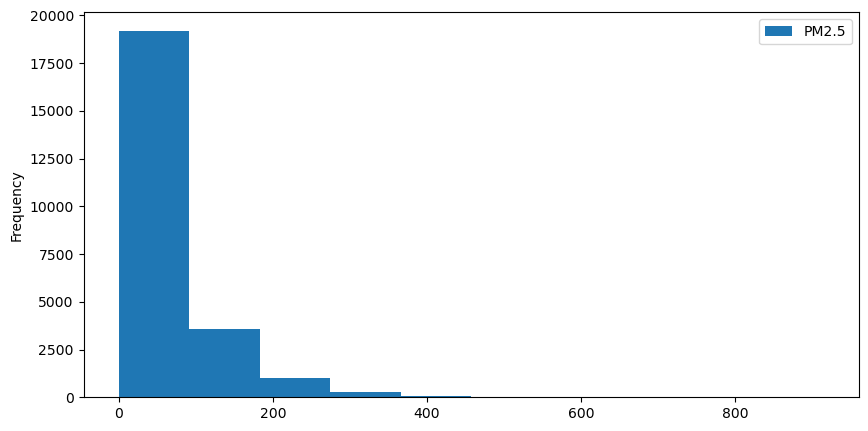

In [20]:
df['PM2.5'].plot(kind = 'hist', figsize=(10,5))
plt.legend()
plt.show()

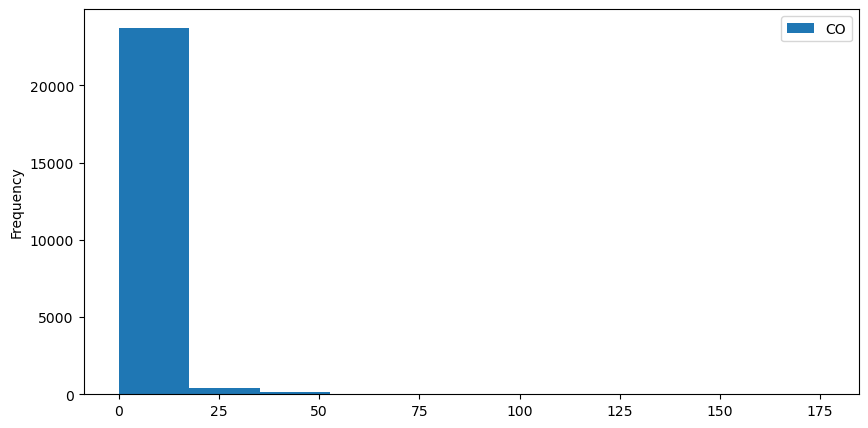

In [21]:
df['CO'].plot(kind = 'hist', figsize=(10,5))
plt.legend()
plt.show()

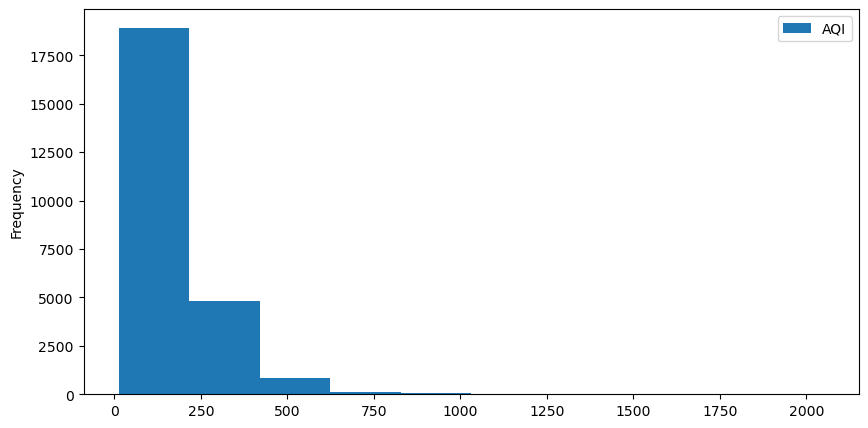

In [22]:
df['AQI'].plot(kind = 'hist', figsize=(10,5))
plt.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

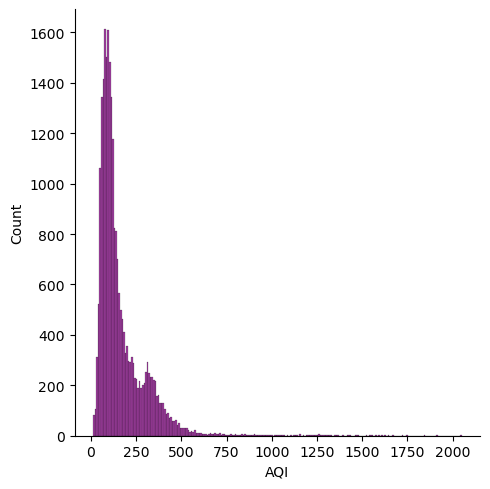

In [23]:
# Distribution of AQI from 2015 to 2020
sns.displot(df, x='AQI', color='purple')
plt.show

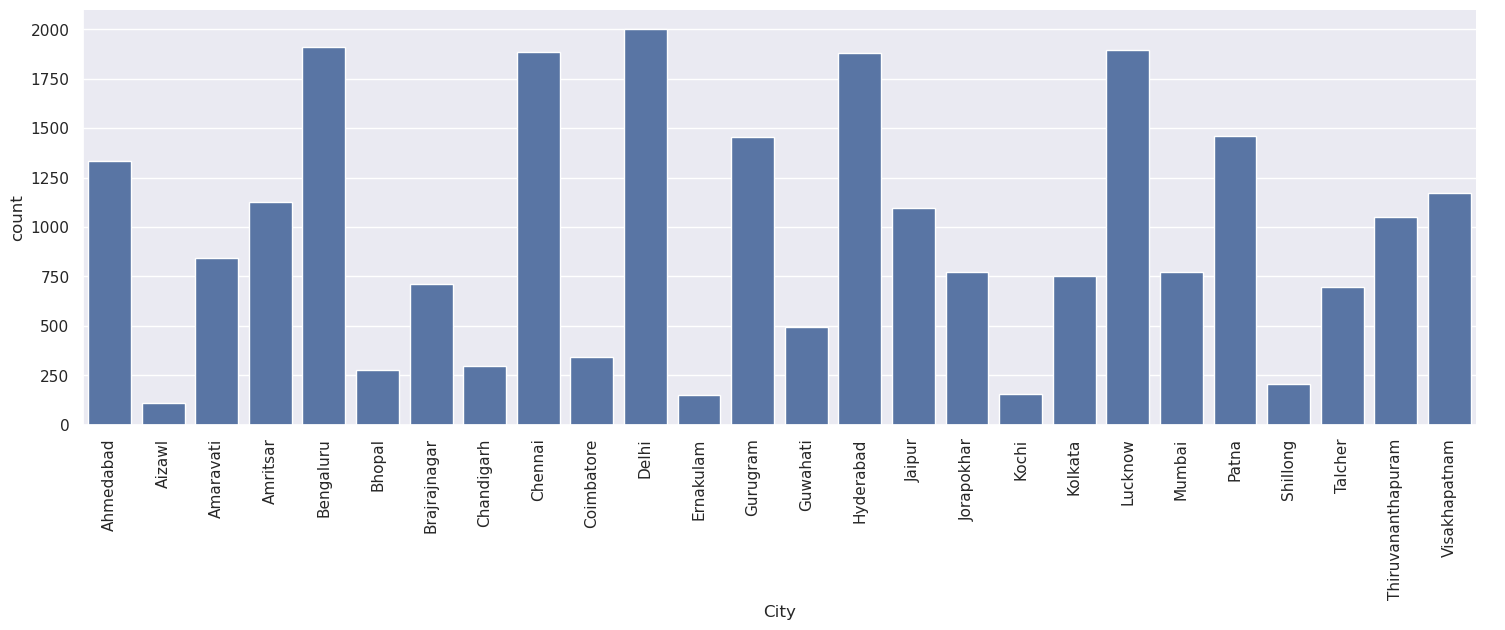

In [24]:
# Bivariate 
sns.set_theme(style="darkgrid")
graph =sns.catplot(x="City", kind='count', data=df, height=5, aspect=3)
graph.set_xticklabels(rotation=90)

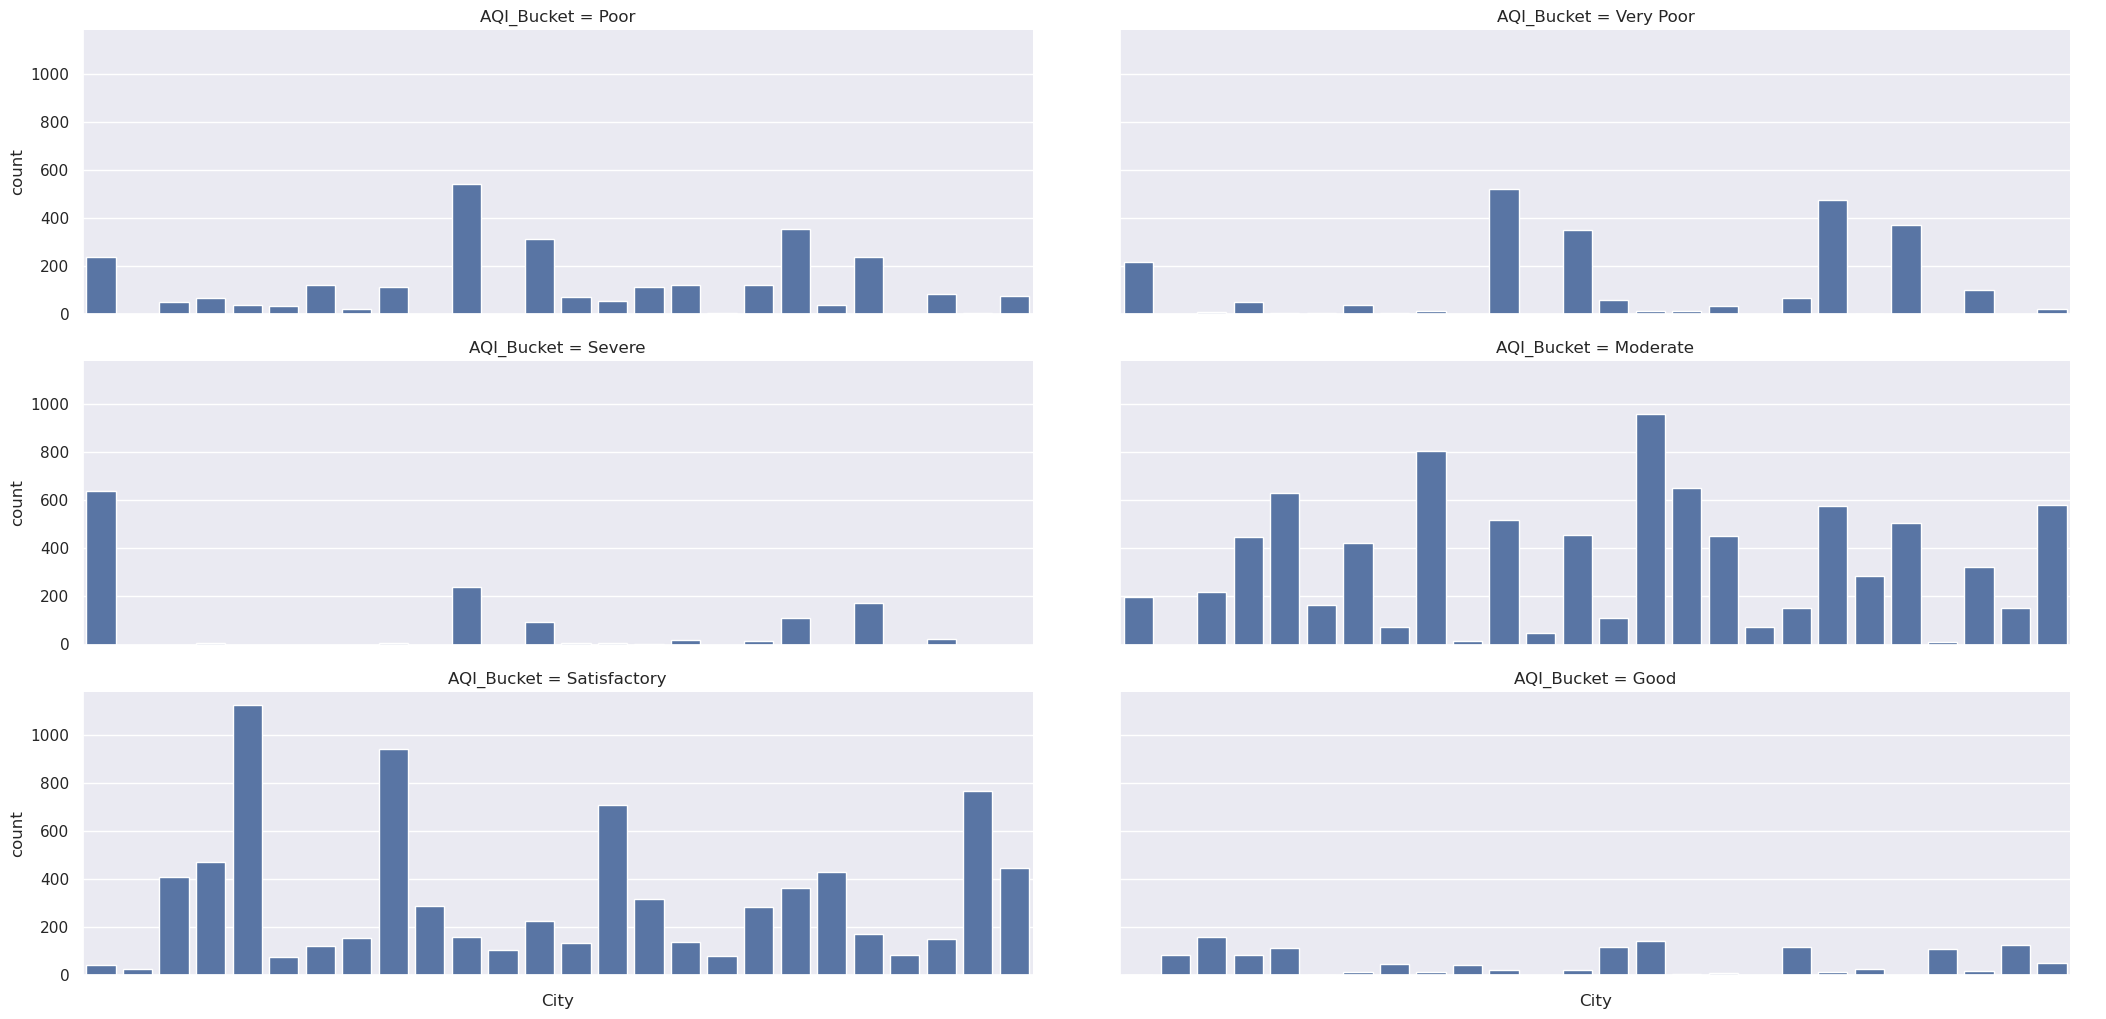

In [25]:
sns.set_theme(style="darkgrid")
graph =sns.catplot(x="City", kind='count', data=df, col="AQI_Bucket", col_wrap=2, 
                   height=3.5, aspect=3)
graph.set_xticklabels(rotation=90)

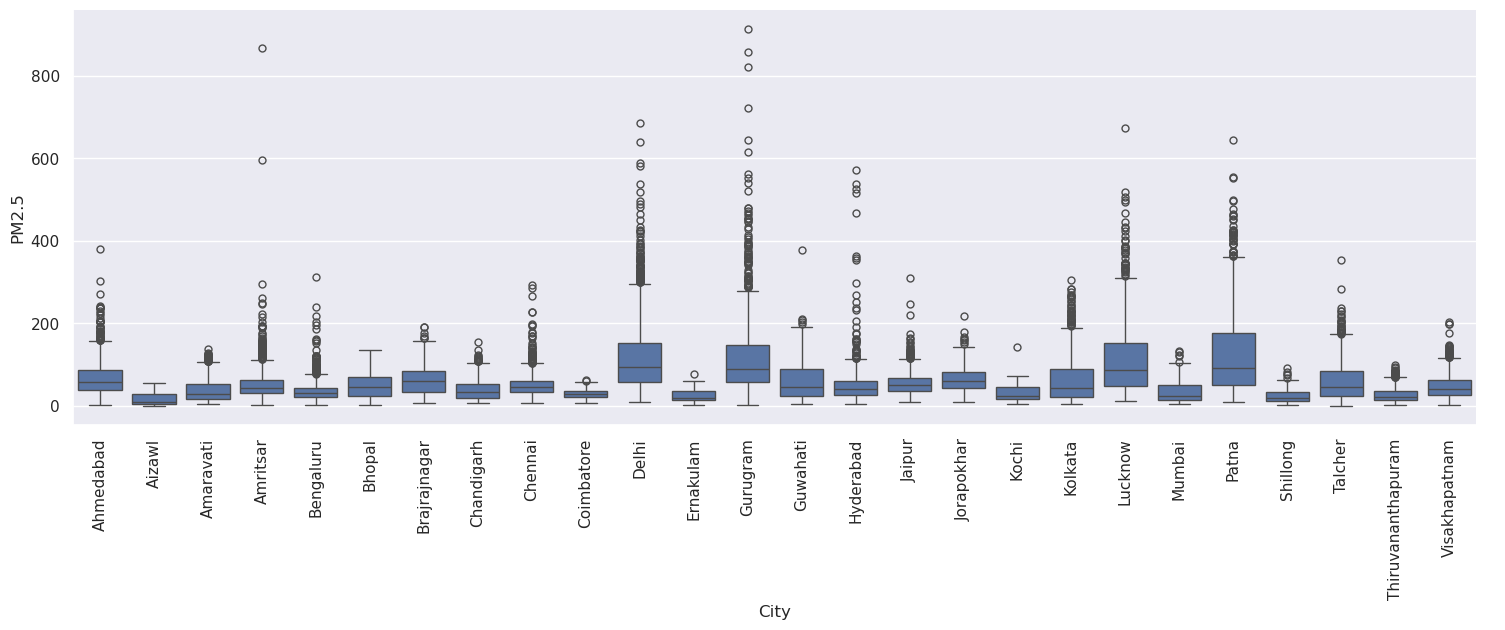

In [26]:
graph1 = sns.catplot(x='City', y='PM2.5', kind='box', data=df, height=5, aspect=3)
graph1.set_xticklabels(rotation=90)

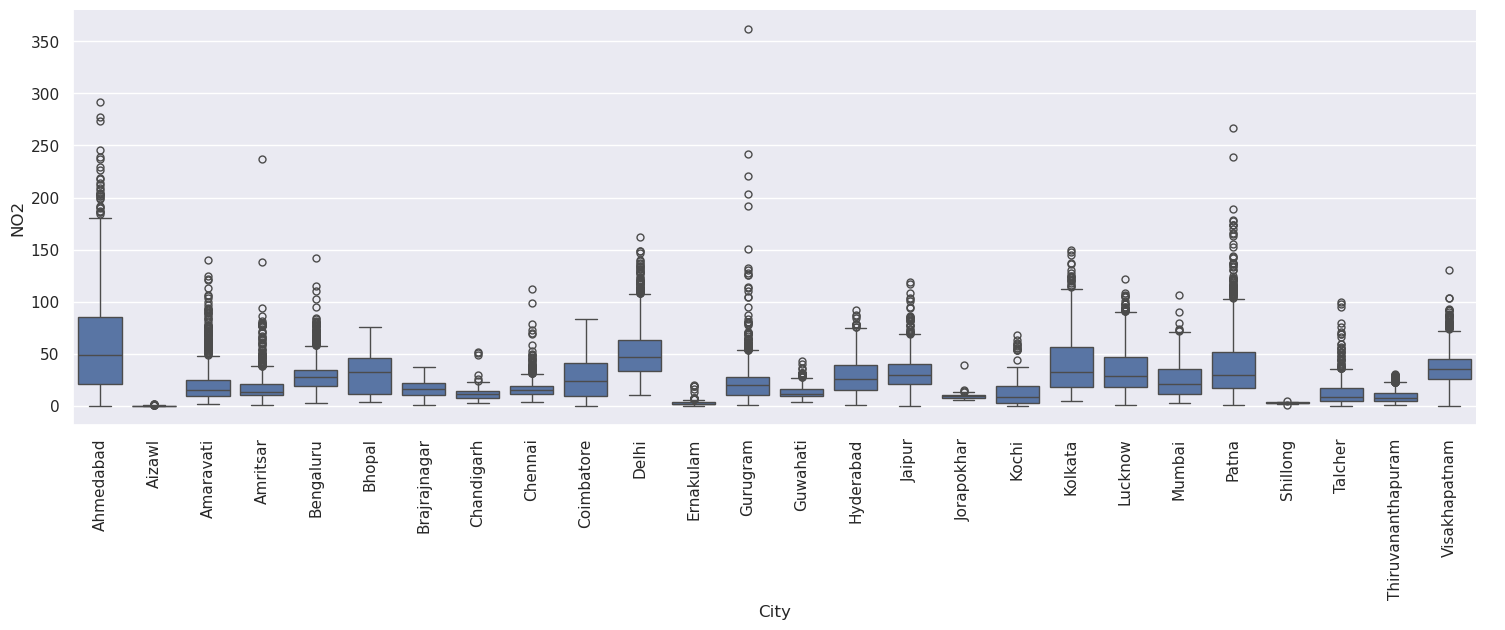

In [27]:
graph2 = sns.catplot(x='City', y='NO2', kind='box', data=df, height=5, aspect=3)
graph2.set_xticklabels(rotation=90)

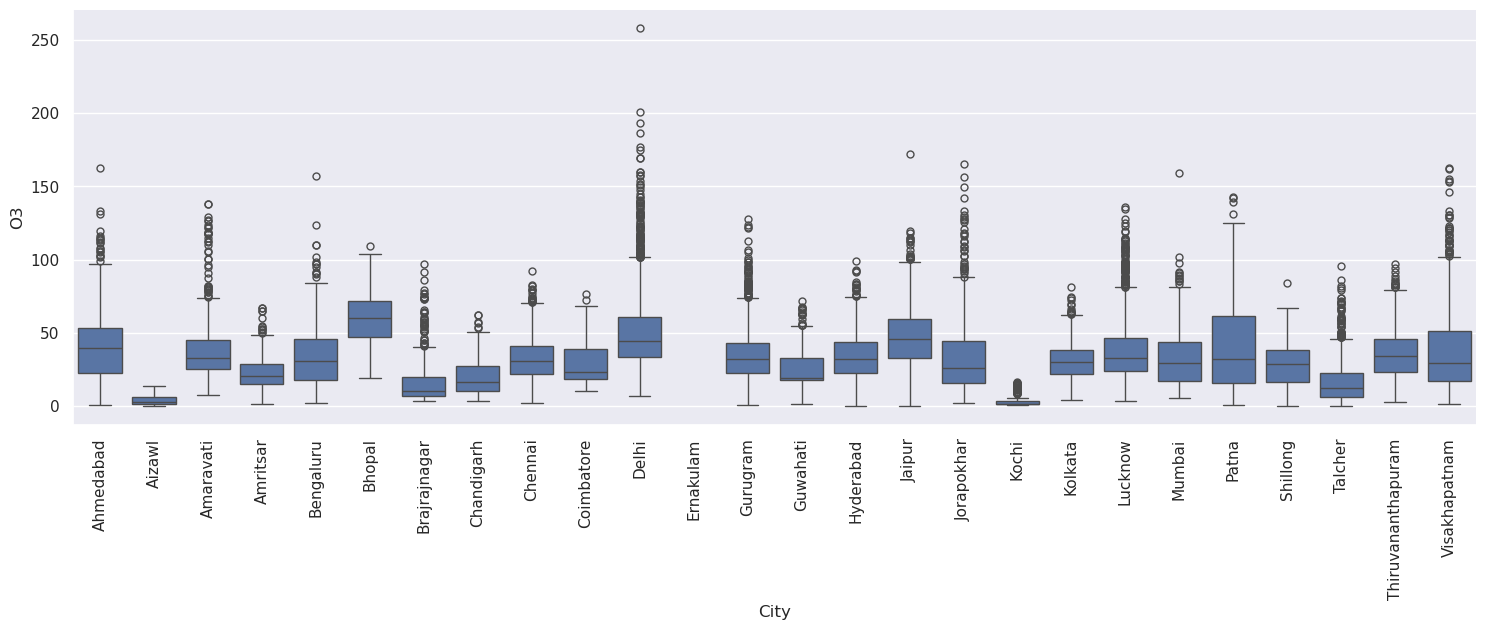

In [28]:
graph3 = sns.catplot(x='City', y='O3', kind='box', data=df, height=5, aspect=3)
graph3.set_xticklabels(rotation=90)

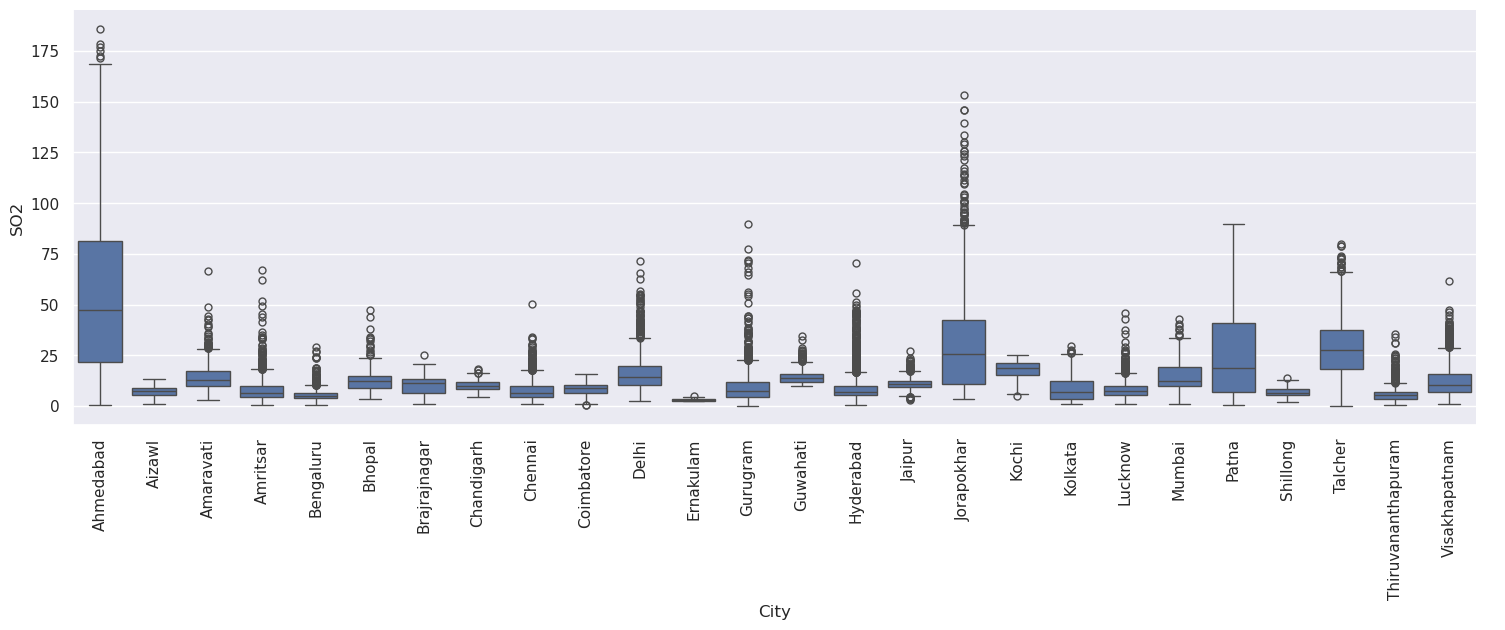

In [29]:
graph4 = sns.catplot(x='City', y='SO2', kind='box', data=df, height=5, aspect=3)
graph4.set_xticklabels(rotation=90)

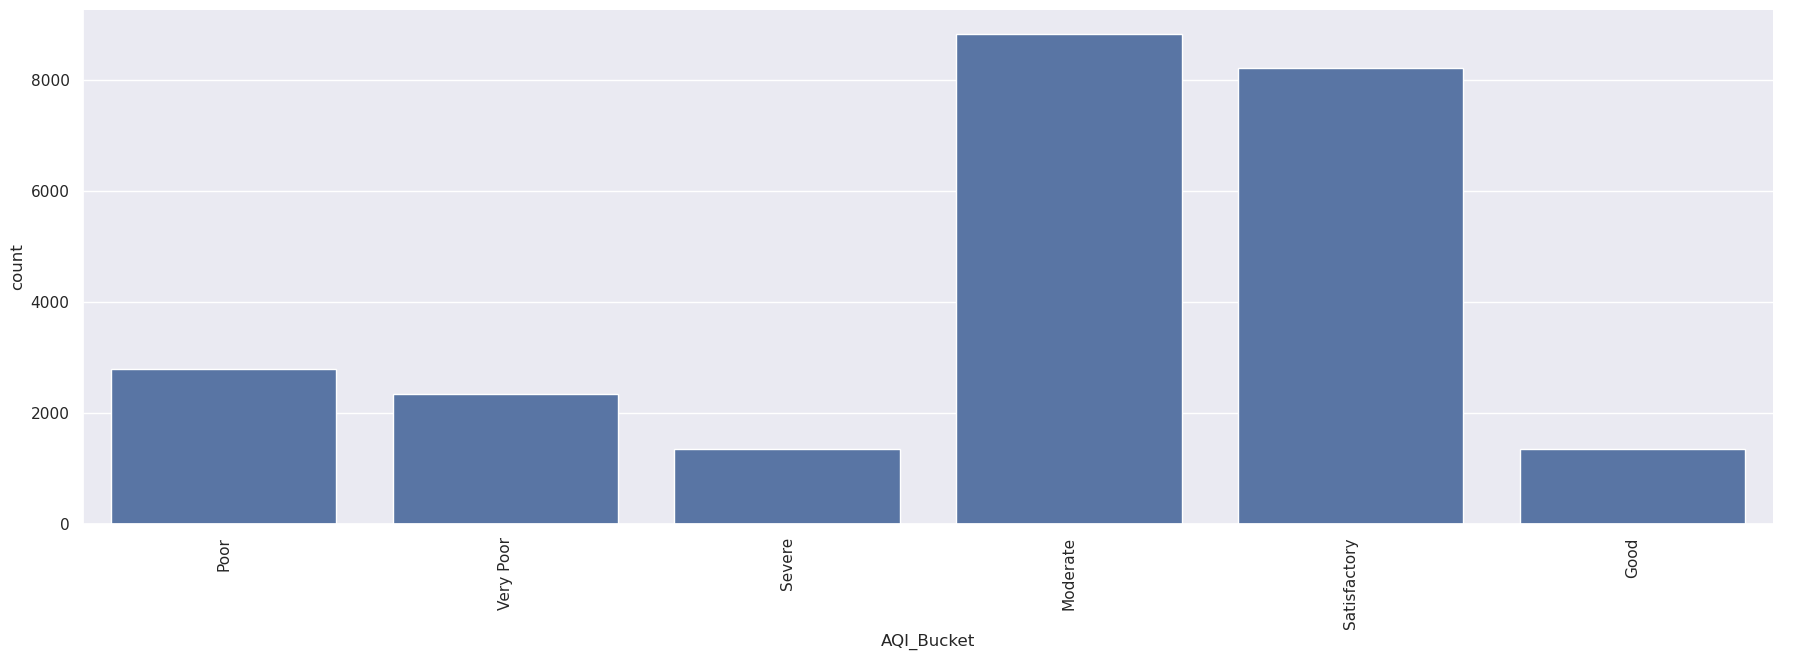

In [30]:
graph5 = sns.catplot(x='AQI_Bucket',  data=df, kind='count', height=6, aspect=3)
graph5.set_xticklabels(rotation=90)

In [31]:
# To check the null values
df.isnull().sum().sort_values(ascending=False)

Xylene        15372
PM10           7086
NH3            6536
Toluene        5826
Benzene        3535
NOx            1857
O3              807
PM2.5           678
SO2             605
CO              445
NO2             391
NO              387
Date              0
City              0
AQI               0
AQI_Bucket        0
dtype: int64

In [32]:
df.describe().loc['mean']

PM2.5       67.476613
PM10       118.454435
NO          17.622421
NO2         28.978391
NOx         32.289012
NH3         23.848366
CO           2.345267
SO2         14.362933
O3          34.912885
Benzene      3.458668
Toluene      9.525714
Xylene       3.588683
AQI        166.463581
Name: mean, dtype: float64

In [33]:
df = df.replace({
    "PM2.5":{np.nan: 67.476613},
    "PM10":{np.nan:118.454435},
    "NO":{np.nan:17.622421},
    "NO2":{np.nan:28.978391},
    "NOx":{np.nan:32.289012},
    "NH3":{np.nan:23.848366},
    "CO":{np.nan:2.345267},
    "SO2":{np.nan:14.362933},
    "O3":{np.nan:34.912885},
    "Benzene":{np.nan:3.458668},
    "Toluene":{np.nan:9.525714},
    "Xylene":{np.nan:3.588683},
    "AQI":{np.nan:166.463581},
})

In [34]:
df.isnull().sum()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [35]:
df=df.drop(['AQI_Bucket'], axis=1)

In [36]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
28,Ahmedabad,2015-01-29,83.13,118.454435,6.93,28.71,33.72,23.848366,6.93,49.52,59.76,0.02,0.00,3.14,209.0
29,Ahmedabad,2015-01-30,79.84,118.454435,13.85,28.68,41.08,23.848366,13.85,48.49,97.07,0.04,0.00,4.81,328.0
30,Ahmedabad,2015-01-31,94.52,118.454435,24.39,32.66,52.61,23.848366,24.39,67.39,111.33,0.24,0.01,7.67,514.0
31,Ahmedabad,2015-02-01,135.99,118.454435,43.48,42.08,84.57,23.848366,43.48,75.23,102.70,0.40,0.04,25.87,782.0
32,Ahmedabad,2015-02-02,178.33,118.454435,54.56,35.31,72.80,23.848366,54.56,55.04,107.38,0.46,0.06,35.61,914.0


<Axes: >

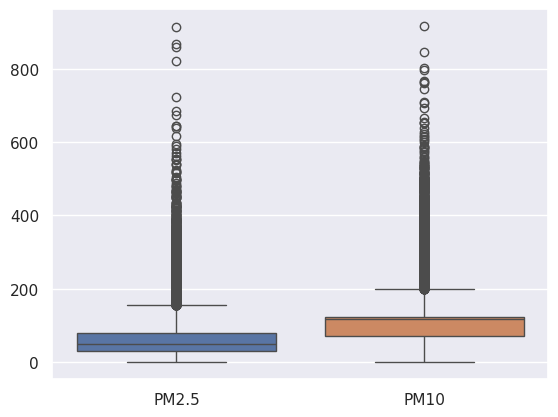

In [37]:
sns.boxplot(data=df[['PM2.5', 'PM10']])

<Axes: >

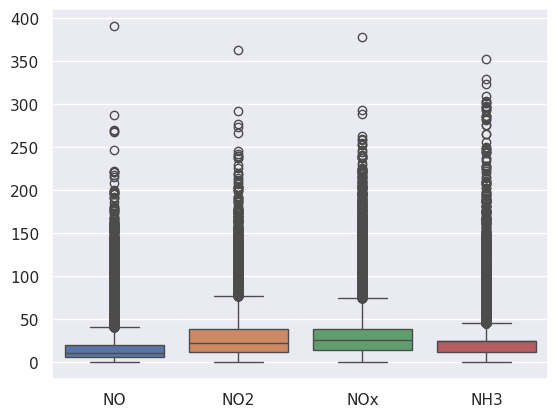

In [38]:
sns.boxplot(data=df[['NO', 'NO2', 'NOx', 'NH3']])

<Axes: >

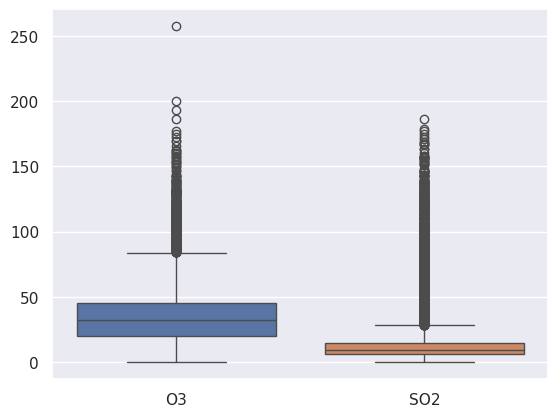

In [39]:
sns.boxplot(data=df[['O3', 'SO2']])

In [40]:
# IQR Method - Q3 Q1
def replace_outliers(df):
    for column in df.select_dtypes(include=['number']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lb = Q1 - 1.5 * IQR
        ub = Q3 + 1.5 * IQR
        df[column] = df[column].apply(
            lambda x:Q1 if x < lb else (Q3 if x > ub else x)
        )
        return df

In [41]:
df = replace_outliers(df)

In [42]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,24850.0,55.174281,31.829575,0.04,29.56,50.165000,79.505625,154.30
PM10,24850.0,118.454435,75.660357,0.03,71.78,118.454435,122.957500,917.08
NO,24850.0,17.622421,22.245859,0.03,5.72,10.075000,19.710000,390.68
NO2,24850.0,28.978391,24.432532,0.01,12.09,22.535000,37.910000,362.21
NOx,24850.0,32.289012,29.542967,0.00,14.03,25.720000,38.170000,378.24
NH3,24850.0,23.848366,22.213762,0.01,11.28,23.848366,24.710000,352.89
CO,24850.0,2.345267,7.011570,0.00,0.59,0.950000,1.530000,175.81
SO2,24850.0,14.362933,17.215217,0.01,5.79,9.430000,14.890000,186.08
O3,24850.0,34.912885,21.368849,0.01,19.64,32.060000,45.397500,257.73
Benzene,24850.0,3.458668,14.851646,0.00,0.34,1.810000,3.458668,455.03


<Axes: >

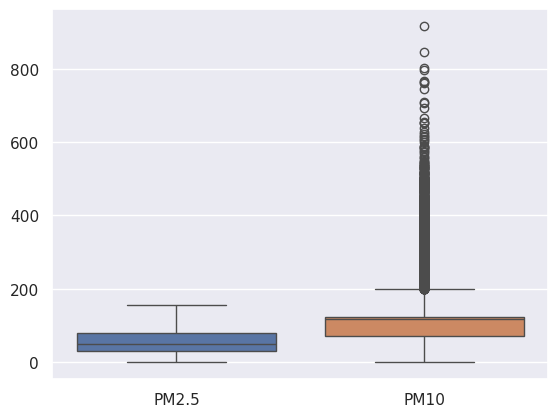

In [43]:
sns.boxplot(data=df[['PM2.5', 'PM10']])

<Axes: >

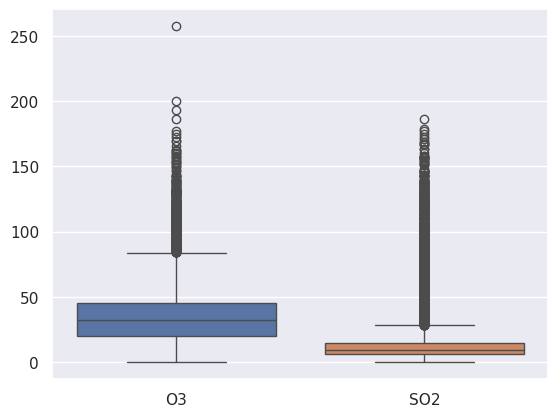

In [44]:
sns.boxplot(data=df[['O3', 'SO2']])

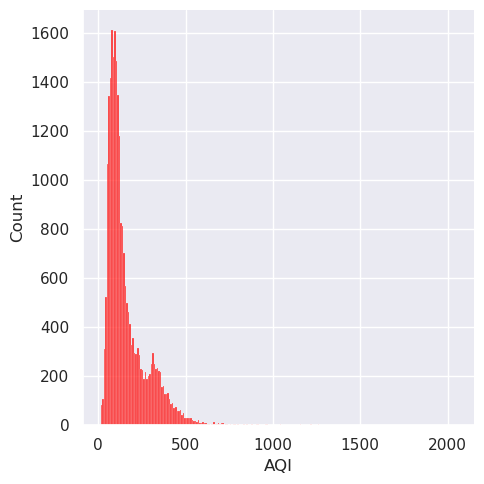

In [45]:
sns.displot(df, x='AQI', color='red')
plt.show()

In [46]:
df1=df.drop(columns=['City'])

In [47]:
pip install --upgrade seaborn

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


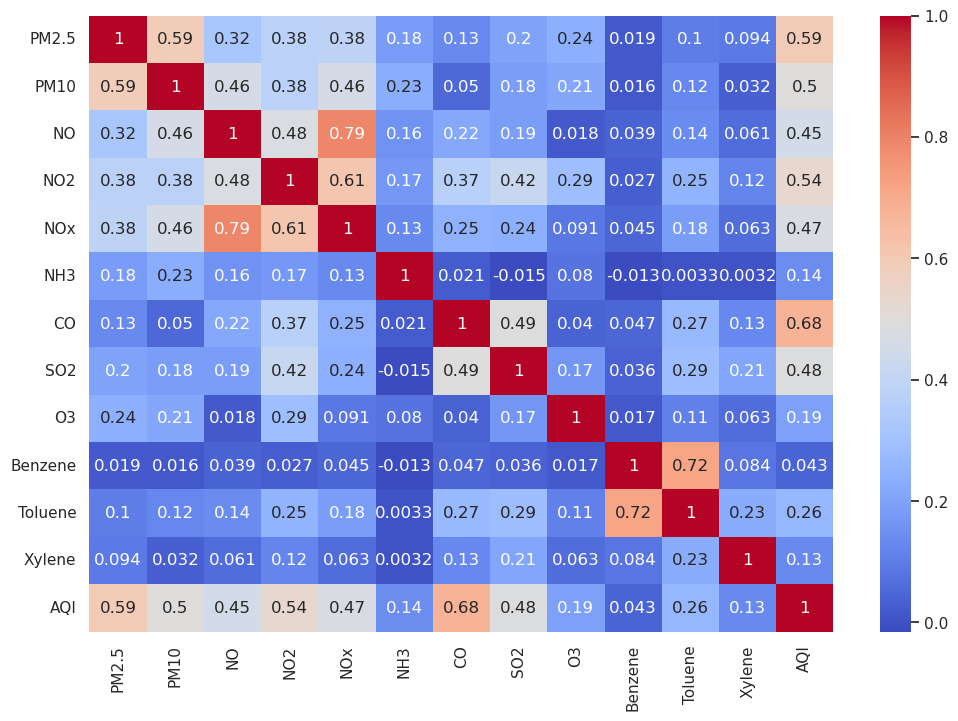

In [48]:
#Multivariate Analysis - Heatmap
plt.figure(figsize=(12, 8))
# Filter only numeric columns from df1
df1_numeric = df1.select_dtypes(include=['float64', 'int64'])

# Now calculate and plot the correlation heatmap
sns.heatmap(df1_numeric.corr(), annot=True, cmap='coolwarm')
plt.show()

#### Week 3 -- Data Modeling

In [49]:
df.drop(['Date','City'],axis=1, inplace=True)
df.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
28,83.1300,118.454435,6.93,28.71,33.72,23.848366,6.93,49.52,59.76,0.02,0.00,3.14,209.0
29,79.8400,118.454435,13.85,28.68,41.08,23.848366,13.85,48.49,97.07,0.04,0.00,4.81,328.0
30,94.5200,118.454435,24.39,32.66,52.61,23.848366,24.39,67.39,111.33,0.24,0.01,7.67,514.0
31,135.9900,118.454435,43.48,42.08,84.57,23.848366,43.48,75.23,102.70,0.40,0.04,25.87,782.0
32,79.5075,118.454435,54.56,35.31,72.80,23.848366,54.56,55.04,107.38,0.46,0.06,35.61,914.0


In [50]:
# Scaling - Standing Scaler
from sklearn.preprocessing import StandardScaler
df = StandardScaler().fit_transform(df)
df1

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
28,2015-01-29,83.1300,118.454435,6.93,28.71,33.72,23.848366,6.93,49.52,59.76,0.020000,0.000000,3.140000,209.0
29,2015-01-30,79.8400,118.454435,13.85,28.68,41.08,23.848366,13.85,48.49,97.07,0.040000,0.000000,4.810000,328.0
30,2015-01-31,94.5200,118.454435,24.39,32.66,52.61,23.848366,24.39,67.39,111.33,0.240000,0.010000,7.670000,514.0
31,2015-02-01,135.9900,118.454435,43.48,42.08,84.57,23.848366,43.48,75.23,102.70,0.400000,0.040000,25.870000,782.0
32,2015-02-02,79.5075,118.454435,54.56,35.31,72.80,23.848366,54.56,55.04,107.38,0.460000,0.060000,35.610000,914.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,2020-06-27,15.0200,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,2.240000,12.070000,0.730000,41.0
29527,2020-06-28,24.3800,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,0.740000,2.210000,0.380000,70.0
29528,2020-06-29,22.9100,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,0.010000,0.010000,0.000000,68.0
29529,2020-06-30,16.6400,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,28.30,0.000000,0.000000,0.000000,54.0


In [51]:
df = pd.DataFrame(df1)

In [52]:
df = pd.DataFrame(df1,columns=df.columns)
df.head()

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
28,2015-01-29,83.1300,118.454435,6.93,28.71,33.72,23.848366,6.93,49.52,59.76,0.02,0.00,3.14,209.0
29,2015-01-30,79.8400,118.454435,13.85,28.68,41.08,23.848366,13.85,48.49,97.07,0.04,0.00,4.81,328.0
30,2015-01-31,94.5200,118.454435,24.39,32.66,52.61,23.848366,24.39,67.39,111.33,0.24,0.01,7.67,514.0
31,2015-02-01,135.9900,118.454435,43.48,42.08,84.57,23.848366,43.48,75.23,102.70,0.40,0.04,25.87,782.0
32,2015-02-02,79.5075,118.454435,54.56,35.31,72.80,23.848366,54.56,55.04,107.38,0.46,0.06,35.61,914.0


In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [54]:
df.columns

Index(['Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI'],
      dtype='object')

In [55]:
#Feature & Target Selection
X= df[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene']]
y= df['AQI']

In [56]:
X.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
28,83.1300,118.454435,6.93,28.71,33.72,23.848366,6.93,49.52,59.76,0.02,0.00,3.14
29,79.8400,118.454435,13.85,28.68,41.08,23.848366,13.85,48.49,97.07,0.04,0.00,4.81
30,94.5200,118.454435,24.39,32.66,52.61,23.848366,24.39,67.39,111.33,0.24,0.01,7.67
31,135.9900,118.454435,43.48,42.08,84.57,23.848366,43.48,75.23,102.70,0.40,0.04,25.87
32,79.5075,118.454435,54.56,35.31,72.80,23.848366,54.56,55.04,107.38,0.46,0.06,35.61


In [57]:
#Split the data into trainig and testing data- Trainig set-80% | Testing set-20%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('shape of X Train', X_train.shape)
print('shape of X Test', X_test.shape)
print('shape of y Train', y_train.shape)
print('shape of y Test', y_test.shape)

shape of X Train (19880, 12)
shape of X Test (4970, 12)
shape of y Train (19880,)
shape of y Test (4970,)


In [58]:

pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


In [60]:
# Linear Regression Model
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [61]:
#  Predicting the value
train_pred = LR.predict(X_train) # Predicting train
test_pred = LR.predict(X_test) #Predicting test

In [62]:
# Evaluation for Linear Regression 
RMSE_train = (np.sqrt(mean_squared_error(y_train,train_pred)))
RMSE_test = (np.sqrt(mean_squared_error(y_test,test_pred)))
print('RMSE Train Data=', str(RMSE_train))
print('RMSE Test Data=', str(RMSE_test))
print('_'* 60)
print('R Squared value for Train =',LR.score(X_train,y_train))
print('R Squared value for Test =',LR.score(X_test,y_test))

RMSE Train Data= 66.12529397678136
RMSE Test Data= 68.07985952190998
____________________________________________________________
R Squared value for Train = 0.7831615276761854
R Squared value for Test = 0.7468810050714808


In [63]:
# KNN
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [64]:

train_pred = knn.predict(X_train) # Predicting train
test_pred = knn.predict(X_test) #Predicting test

# Evaluation for KNN
RMSE_train = (np.sqrt(mean_squared_error(y_train,train_pred)))
RMSE_test = (np.sqrt(mean_squared_error(y_test,test_pred)))
print('RMSE Train Data=', str(RMSE_train))
print('RMSE Test Data=', str(RMSE_test))
print('_'* 60)
print('R Squared value for Train =',knn.score(X_train,y_train))
print('R Squared value for Test =',knn.score(X_test,y_test))

RMSE Train Data= 44.29190352998908
RMSE Test Data= 54.56798259369753
____________________________________________________________
R Squared value for Train = 0.9027141230731799
R Squared value for Test = 0.8373840159935572


In [65]:
# Decision  Tree
dtr= DecisionTreeRegressor()
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [66]:

train_pred = dtr.predict(X_train) # Predicting train
test_pred = dtr.predict(X_test) #Predicting test

# Evaluation for Decision Tree Regression 
RMSE_train = (np.sqrt(mean_squared_error(y_train,train_pred)))
RMSE_test = (np.sqrt(mean_squared_error(y_test,test_pred)))
print('RMSE Train Data=', str(RMSE_train))
print('RMSE Test Data=', str(RMSE_test))
print('_'* 60)
print('R Squared value for Train =',dtr.score(X_train,y_train))
print('R Squared value for Test =',dtr.score(X_test,y_test))

RMSE Train Data= 3.0500698913032784
RMSE Test Data= 66.62030623765355
____________________________________________________________
R Squared value for Train = 0.9995386604479184
R Squared value for Test = 0.7576178213085365


In [67]:
# Random Tree Regression
rtr= RandomForestRegressor()
rtr.fit(X_train,y_train)

RandomForestRegressor()

In [68]:
train_pred = rtr.predict(X_train) # Predicting train
test_pred = rtr.predict(X_test) #Predicting test

# Evaluation for Random Tree Regression 
RMSE_train = (np.sqrt(mean_squared_error(y_train,train_pred)))
RMSE_test = (np.sqrt(mean_squared_error(y_test,test_pred)))
print('RMSE Train Data=', str(RMSE_train))
print('RMSE Test Data=', str(RMSE_test))
print('_'* 60)
print('R Squared value for Train =',rtr.score(X_train,y_train))
print('R Squared value for Test =',rtr.score(X_test,y_test))

RMSE Train Data= 17.233675939602875
RMSE Test Data= 44.66738879781902
____________________________________________________________
R Squared value for Train = 0.9852715531522589
R Squared value for Test = 0.8910396310279782
